# Feature Transformation 特征转换

## 主成分分析（PCA，principal components analysis）

主成分分析将多个相关特征的数据集投影到相关特征较少的坐标系上。

PCA 本身是无监督任务。

PCA 的过程分为 4 步：
1. 创建数据集的协方差矩阵
2. 计算协方差矩阵的特征值
3. 保留前 k 个特征值（按特征值降序排列）
4. 用保留的特征向量转换新的数据点

接下来用鸢尾花数据集示例使用 PCA。

In [1]:
from sklearn.datasets import load_iris

# 导入数据集
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

In [2]:
# 要预测的花的名称
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# 用于预测的特征名称
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

我们选取"sepal length(cm)"和"sepal width(cm)"绘图看看：

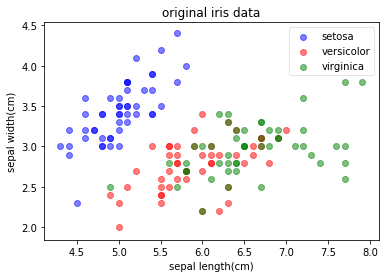

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 自定义一个可视化的方法
label_dict = {i:k for i,k in enumerate(iris.target_names)}
def plot(x, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(
    range(3),('^','s','o'),('blue','red','green')):
        plt.scatter(x=x[:,0].real[y == label],
                   y = x[:,1].real[y == label],
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label]
                   )
        
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
plot(iris_X, iris_y, "original iris data", "sepal length(cm)", "sepal width(cm)")

### 手动计算 PCA

#### 1.创建数据集的协方差矩阵

In [5]:
import numpy as np

# 先计算特征的均值向量（后面使用）
mean_vector = iris_X.mean(axis=0)
mean_vector

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [6]:
# 计算协方差矩阵
cov_mat = np.cov((iris_X).T)
cov_mat.shape

(4, 4)

现在cov_mat变量是4 × 4的协方差矩阵。

#### 2.计算协方差矩阵的特征值

In [7]:
# 计算鸢尾花数据集的特征向量和特征值
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# 按降序打印特征向量和相应的特征值
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-')

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034863
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.2426707479286339
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.07820950004291913
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973449178
------------------------------


#### 3. 按降序保留前 k 个特征值

我们取每个特征向量（主成分）的特征值，将其除以所有特征值的和，计算每个特征向量解释方差的百分比：

In [8]:
# 每个主成分解释的百分比是特征值除以特征值之和
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% of Variance Explained <= k')

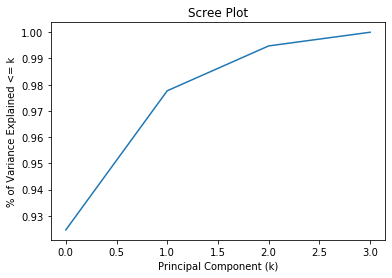

In [9]:
# 绘制碎石图

plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

前两个主成分就占了原始方差的近 98%，意味着几乎可以只用前两个特征向量作为新的主成分。

#### 4.使用保留的特征向量转换新的数据点

在做出保留两个主成分的决定后（这个数字是靠网格搜索还是分析碎石图得到的无关紧要），我们必须能用这些主成分转换新的样本数据点。首先隔离这两个特征向量，存储在top_2_eigenvectors变量中：

In [10]:
# 保存两个特征向量
top_2_eigenvectors = eig_vec_cov[:,:2].T

# 转置，每行是一个主成分，两行代表两个主成分
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

将 iris_X 和 top_2_eigenvectors 两个矩阵相乘

![image.png](./img/pca_4.png)
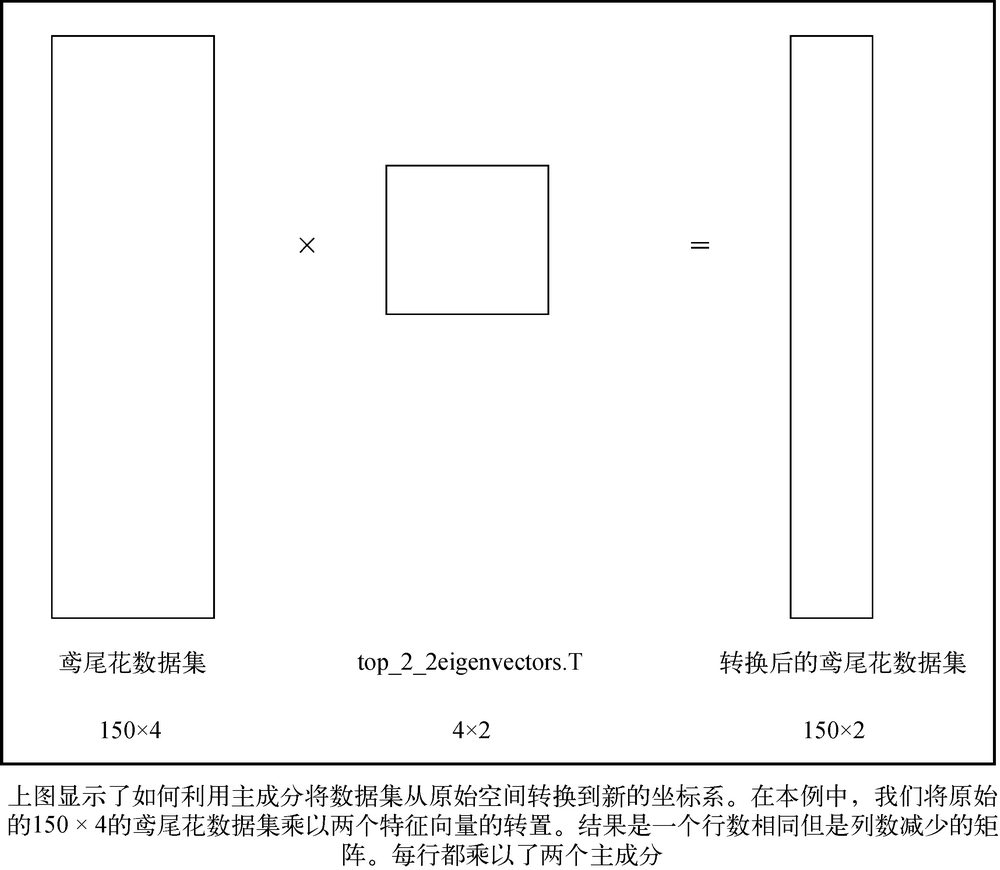

In [11]:
# 将数据集 从150 × 4 转换到 150 × 2
# 将数据矩阵和特征向量相乘

new_iris_X = np.dot(iris_X, top_2_eigenvectors.T)
new_iris_X[:5,]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

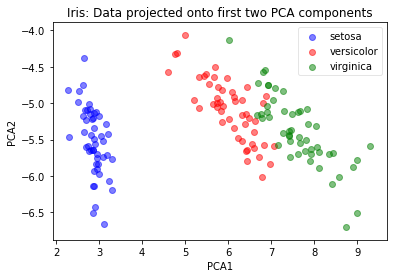

In [12]:
plot(new_iris_X, iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

我们将四维的鸢尾花数据集转换成了只有两列的新矩阵，而这个新矩阵可以在机器学习流水线中代替原始数据集。

### 在 scikit-learn 中使用 PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# 查看一下PCA对象的属性
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

components_ 应该是和前面的 top_2_eigenvectors 变量匹配的。

In [15]:
# 用 PCA 对象的 transform 方法，将数据投影到新的二维平面上
new_iris_X_skl = pca.transform(iris_X)

# scikit-learn 的 PCA 会将数据中心化，所以和手动过程的数据不一样
new_iris_X_skl[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

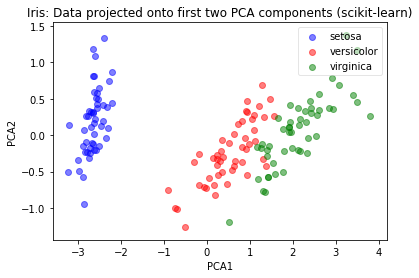

In [16]:
plot(new_iris_X_skl, iris_y, "Iris: Data projected onto first two PCA components (scikit-learn)", "PCA1", "PCA2")

## 线性判别分析（LDA，linear discriminant analysis）

线性判别分析是特征变换算法，也是有监督分类器。

LDA一般用作分类流水线的预处理步骤。

和PCA一样，LDA的目标是提取一个新的坐标系，将原始数据集投影到一个低维空间中。

和PCA的主要区别在于，LDA不会专注于数据的方差，而是优化低维空间，以获得最佳的类别可分性。意思是，新的坐标系在为分类模型查找决策边界时更有用，非常适合用于构建分类流水线。

LDA 的 5 个步骤：
1. 计算每个类别的均值向量；
2. 计算类内和类间的散布矩阵；
3. 计算 $\boldsymbol{S}^{-1}_W\boldsymbol{S}_B$ 的特征值和特征向量；
4. 降序排列特征值，保留前k个特征向量；
5. 用前几个特征向量将数据投影到新空间。

同样使用鸢尾花数据。

### 手动计算 LDA

#### 1.计算每个类别的均值向量

In [17]:
# 每个类别的均值向量
# 将鸢尾花数据集分成3块
# 每块代表一种鸢尾花，计算均值
mean_vectors = []
for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y==cl], axis=0)
    mean_vectors.append(class_mean_vector)
    print(label_dict[cl], class_mean_vector)

setosa [5.006 3.428 1.462 0.246]
versicolor [5.936 2.77  4.26  1.326]
virginica [6.588 2.974 5.552 2.026]


#### 2.计算类内和类间的散布矩阵

我们先计算类内的散布矩阵，定义如下：
$$
\boldsymbol{S}_W=\sum^c_{i=1}\boldsymbol{S}_i
$$
$\boldsymbol{S}_i$的定义是：
$$
\boldsymbol{S}_i=\sum^n_{\boldsymbol{x}\in D_i}(\boldsymbol{x}-\boldsymbol{m}_i)(\boldsymbol{x}-\boldsymbol{m}_i)^T
$$
在这里，$\boldsymbol{m}_i$代表第$i$个类别的均值向量。类间散布矩阵的定义是：
$$
\boldsymbol{S}_B=\sum^c_{i=1}\boldsymbol{N}_i(\boldsymbol{m}_i-\boldsymbol{m})(\boldsymbol{m}_i-\boldsymbol{m})^T
$$
$\boldsymbol{m}$是数据集的总体均值，$\boldsymbol{m}_i$是每个类别的样本均值，$\boldsymbol{N}_i$是每个类别的样本大小（观察值数量）：

In [18]:
# 类内散布矩阵
S_W = np.zeros((4,4))
# 对于每种鸢尾花
for cl,mv in zip([0, 1, 2], mean_vectors):
    # 从0开始，每个类别的散布矩阵
    class_sc_mat = np.zeros((4,4))
    # 对于每个样本
    for row in iris_X[iris_y == cl]:
        # 列向量
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        # 4 × 4的矩阵
        class_sc_mat += (row-mv).dot((row-mv).T)
    # 散布矩阵的和
    S_W += class_sc_mat

S_W

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [19]:
# 类间散布矩阵

# 数据集的均值
overall_mean = np.mean(iris_X, axis=0).reshape(4,1)

# 会变成散布矩阵
S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):
    # 每种花的数量
    n = iris_X[iris_y==i,:].shape[0]
    # 每种花的列向量
    mean_vec = mean_vec.reshape(4,1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

S_B

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

#### 3.计算 $\boldsymbol{S}^{-1}_W\boldsymbol{S}_B$ 的特征值和特征向量

In [20]:
# 计算矩阵的特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
eig_vecs = eig_vecs.real
eig_vals = eig_vals.real

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i]
    print('Eigenvector {}: {}'.format(i+1, eigvec_sc))
    print('Eigenvalue {:}: {}'.format(i+1, eig_vals[i]))
    print

Eigenvector 1: [ 0.20874182  0.38620369 -0.55401172 -0.7073504 ]
Eigenvalue 1: 32.19192919827803
Eigenvector 2: [-0.00653196 -0.58661055  0.25256154 -0.76945309]
Eigenvalue 2: 0.28539104262306414
Eigenvector 3: [ 0.88513899 -0.29455053 -0.27255052 -0.23555291]
Eigenvalue 3: 3.5296362660244315e-15
Eigenvector 4: [-0.80593687  0.40432808  0.41273963 -0.12895956]
Eigenvalue 4: 3.17116800810927e-17


#### 4.降序排列特征值，保留前k个特征向量

In [21]:
# 保留最好的两个线性判别式
linear_discriminants = eig_vecs.T[:2]

linear_discriminants

array([[ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ],
       [-0.00653196, -0.58661055,  0.25256154, -0.76945309]])

#### 5.用前几个特征向量将数据投影到新空间

In [22]:
lda_iris_projection = np.dot(iris_X, linear_discriminants.T)
lda_iris_projection[:5,]

array([[ 1.49920971, -1.88675441],
       [ 1.2643595 , -1.59214275],
       [ 1.35525305, -1.73341462],
       [ 1.18495616, -1.62358806],
       [ 1.5169559 , -1.94476227]])

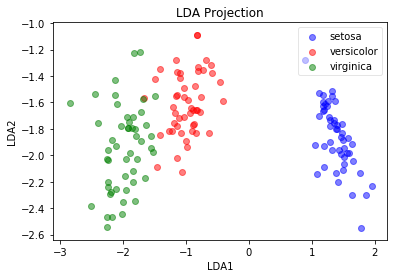

In [23]:
plot(lda_iris_projection, iris_y, "LDA Projection", "LDA1", "LDA2")

### 在 scikit-learn 中使用 LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 实例化 LDA 模块
lda = LinearDiscriminantAnalysis(n_components=2)

# 拟合并转换鸢尾花数据
X_lda_iris = lda.fit_transform(iris_X, iris_y)

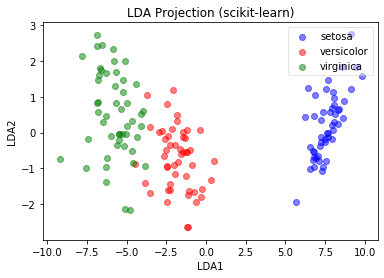

In [25]:
# 绘制投影数据
plot(X_lda_iris, iris_y, "LDA Projection (scikit-learn)", "LDA1", "LDA2")

scikit-learn 计算特征向量的方式虽然得到了相同的结果，但是会进行标量缩放

## 在鸢尾花数据集中应用 LDA 与 PCA

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [27]:
# 创建有一个主成分的 PCA 模块
single_pca = PCA(n_components=1)

# 创建有一个判别式的 LDA 模块
single_lda = LinearDiscriminantAnalysis(n_components=1)

# 实例化 KNN 模型
knn = KNeighborsClassifier(n_neighbors=3)

不用特征转换，用KNN进行交叉验证

In [28]:
knn_average = cross_val_score(knn, iris_X, iris_y).mean()
knn_average

E:\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9803921568627452

这是基线准确率。如果什么也不做，KNN的准确率是98%。

接下来，组合使用缩放、PCA、LDA 和 KNN。

In [29]:
from sklearn.preprocessing import StandardScaler

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # 网格搜索的模型
                        params,          # 试验的参数
                        error_score=0.,  # 如果出错，当作结果是0
                        cv=5)  
    grid.fit(X, y) 
    
    # 传统的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 最好参数
    print("Best Parameters: {}".format(grid.best_params_))
    # 平均拟合时间（秒）
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 平均预测时间（秒）
    # 显示模型在实时分析中的性能
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [30]:
from sklearn.model_selection import GridSearchCV

iris_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components':[1, 2, 3, 4],
    
    # 根据 scikit-learn 文档，LDA 的最大 n_components 是类别数减 1
    'preprocessing__lda__n_components': [1],

    'clf__n_neighbors': range(1, 9)
}

# 流水线
preprocessing = Pipeline([('scale', StandardScaler()),
                          ('pca', PCA()),
                          ('lda', LinearDiscriminantAnalysis())])
iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                                ('clf', KNeighborsClassifier())])

get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

Best Accuracy: 0.9933333333333333
Best Parameters: {'clf__n_neighbors': 8, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.004
Average Time to Score (s): 0.004
